# DeSMOG Dataset
This notebook explores the DeSMOG dataset, a set of 2k labeled quotes from climate-change related articles which attempt to quantify the level of agreement to the existance of climate change from disagree to neutral to agree. 

In [11]:
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

NOTEBOOK_LOC = "/content/drive/MyDrive/Colab Notebooks/W266 Final Project/"

Mounted at /content/drive


In [4]:
data = pd.read_table(NOTEBOOK_LOC + "Data/GWSD.tsv")

In [5]:
data.head(10)

,Unnamed: 0,round,batch,sent_id,sentence,worker_0,worker_1,worker_2,worker_3,worker_4,worker_5,worker_6,worker_7,disagree,agree,neutral,guid,in_held_out_test
0,0,1,0,s0,Global warming is a hoax.,disagrees,disagrees,disagrees,disagrees,disagrees,disagrees,disagrees,disagrees,NaN,NaN,NaN,1_0_s0,False
1,1,1,0,s1,Alarming levels of sea level rise are predicte...,neutral,neutral,neutral,agrees,agrees,neutral,neutral,agrees,NaN,NaN,NaN,1_0_s1,False
2,2,1,0,s2,"Over the past several years, the United States...",neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,NaN,NaN,NaN,1_0_s2,False
3,3,1,0,s3,Global warming is happening and it will be dan...,agrees,agrees,agrees,agrees,agrees,agrees,agrees,agrees,NaN,NaN,NaN,1_0_s3,False
4,4,1,0,s4,Some icebergs are cute.,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,NaN,NaN,NaN,1_0_s4,False
5,5,1,0,t0,Warmer-than-normal sea surface temperatures ar...,neutral,neutral,neutral,agrees,agrees,agrees,agrees,agrees,0.003105,0.711260,0.285634,1_0_t0,False
6,6,1,0,t1,We will continue to rely in part on fossil fue...,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,0.000830,0.001163,0.998006,1_0_t1,False
7,7,1,0,t10,The actual rise in sea levels measured only 1....,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,0.000802,0.001174,0.998023,1_0_t10,False
8,8,1,0,t11,Claims of global warming have been greatly exa...,disagrees,disagrees,disagrees,disagrees,disagrees,disagrees,disagrees,disagrees,0.997695,0.001171,0.001134,1_0_t11,False
9,9,1,0,t12,The Intergovernmental Panel on Climate Change ...,neutral,disagrees,neutral,neutral,neutral,neutral,neutral,neutral,0.031351,0.002962,0.965687,1_0_t12,False


Remove sanity-check data and NaN's. Add overall stance labels

To mitigate individal worker bias/unreliability, 8 workers were asked to label the dataset. Then, a Bayesian model was fitted to determine the likelihood from the 8 labels of the appropriate label. While this can be used for classification, we also want to examine single-label predictions. We will add another column that takes the most likely class as the label.

In [6]:
data = data[5:]
data = data[5:]
data = data.dropna()
data["stance"] = data[["agree", "neutral", "disagree"]].idxmax(axis=1)
data["stance_id"] = data.stance.map({'disagree': int(0), 'neutral': int(1), 'agree': int(2)})
data.head(10)

,Unnamed: 0,round,batch,sent_id,sentence,worker_0,worker_1,worker_2,worker_3,worker_4,worker_5,worker_6,worker_7,disagree,agree,neutral,guid,in_held_out_test,stance,stance_id
10,10,1,0,t13,Evidence now leans against global warming resu...,disagrees,agrees,disagrees,neutral,neutral,disagrees,neutral,disagrees,0.535462,0.063947,0.400591,1_0_t13,True,disagree,0
11,11,1,0,t14,Flooding has been going on forever.,disagrees,disagrees,disagrees,neutral,neutral,neutral,disagrees,disagrees,0.710993,0.004516,0.284491,1_0_t14,False,disagree,0
12,12,1,0,t15,Simply reducing emissions will not sufficientl...,neutral,agrees,agrees,agrees,agrees,agrees,agrees,agrees,0.001704,0.973336,0.024960,1_0_t15,False,agree,2
13,13,1,0,t16,Climate deniers blame global warming on aliens...,disagrees,agrees,neutral,agrees,neutral,neutral,agrees,neutral,0.051909,0.387853,0.560239,1_0_t16,False,neutral,1
14,14,1,0,t17,"Global warming is inevitably going to be, at b...",disagrees,agrees,agrees,neutral,agrees,neutral,disagrees,neutral,0.199417,0.477698,0.322885,1_0_t17,False,agree,2
15,15,1,0,t18,"Some parts of the world the world, such as the...",neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,0.000800,0.001184,0.998016,1_0_t18,False,neutral,1
16,16,1,0,t19,If carbon dioxide emissions continue to rise b...,neutral,neutral,agrees,neutral,neutral,neutral,agrees,agrees,0.003270,0.336216,0.660514,1_0_t19,False,neutral,1
17,17,1,0,t2,The study is one more example that you can get...,disagrees,disagrees,disagrees,disagrees,disagrees,neutral,disagrees,disagrees,0.977475,0.002410,0.020115,1_0_t2,False,disagree,0
18,18,1,0,t20,Millions more people around the world are thre...,agrees,agrees,neutral,agrees,agrees,agrees,agrees,neutral,0.002646,0.869270,0.128084,1_0_t20,False,agree,2
19,19,1,0,t21,45 % of the general public view perceived glob...,neutral,neutral,neutral,agrees,neutral,neutral,neutral,neutral,0.001904,0.036557,0.961540,1_0_t21,True,neutral,1


In [7]:
data[["worker_0", "worker_1", "worker_2", "worker_3", "worker_4", "worker_5", "worker_6", "worker_7"]].apply(pd.Series.value_counts)

,worker_0,worker_1,worker_2,worker_3,worker_4,worker_5,worker_6,worker_7
neutral,877,900,865,852,897,851,884,898
agrees,800,750,815,781,779,796,772,763
disagrees,368,395,365,412,369,398,389,384


In [18]:
data.stance.value_counts()

neutral     870
agree       776
disagree    399
Name: stance, dtype: int64

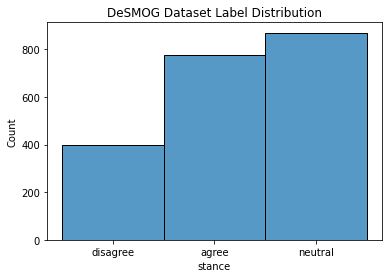

In [17]:
sns.histplot(data=data, x="stance")
plt.title("DeSMOG Dataset Label Distribution")
plt.savefig(NOTEBOOK_LOC + '/ModelResults/LabelHist.png')
plt.show()

Above we observe a class imbalance, where "disagree" is half of "neutral" and "agree". However, the experiments done in the original DeSMOG paper address this - and note that class balancing did not improve performance. 

Next, we remove the 20% held-out dataset that the researched balanced for label and source political leaning

In [ ]:
len(data[data.in_held_out_test == True])

200

In [ ]:
training_data = data[data.in_held_out_test == False]
test_data = data[data.in_held_out_test == True]

### Create Data for 5-Fold Cross Validation and Save


In [ ]:
folds = KFold(n_splits=5)
i = 0
for trainIndex, testIndex in folds.split(training_data):
  # print(trainIndex, testIndex)
  xTrain = training_data.iloc[trainIndex]
  xVal = training_data.iloc[testIndex]

  xTrain.to_csv(NOTEBOOK_LOC + '/Data/'+ 'GWSD_training_'+str(i)+'.tsv', sep="\t")
  xVal.to_csv(NOTEBOOK_LOC + '/Data/'+ 'GWSD_val_'+str(i)+'.tsv',sep="\t")

  i+=1


test_data.to_csv(NOTEBOOK_LOC + '/Data/'+ 'GWSD_test.tsv',sep="\t")

#### This is a hard, confusing problem - even for humans

Below are some example sentences that received all three labels from workers.

In [ ]:
print(data.loc[13,["worker_0", "worker_1", "worker_2", "worker_3", "worker_4", "worker_5", "worker_6", "worker_7", "sentence"]])
print(data.loc[13,["sentence"]].values[0])

worker_0                                            disagrees
worker_1                                               agrees
worker_2                                              neutral
worker_3                                               agrees
worker_4                                              neutral
worker_5                                              neutral
worker_6                                               agrees
worker_7                                              neutral
sentence    Climate deniers blame global warming on aliens...
Name: 13, dtype: object
Climate deniers blame global warming on aliens from outer space.


In [ ]:
print(data.loc[14,["worker_0", "worker_1", "worker_2", "worker_3", "worker_4", "worker_5", "worker_6", "worker_7", "sentence"]])
print(data.loc[14,["sentence"]].values[0])

worker_0                                            disagrees
worker_1                                               agrees
worker_2                                               agrees
worker_3                                              neutral
worker_4                                               agrees
worker_5                                              neutral
worker_6                                            disagrees
worker_7                                              neutral
sentence    Global warming is inevitably going to be, at b...
Name: 14, dtype: object
Global warming is inevitably going to be, at best, managed .
